# Subatomic Particle Identification EDA

Our statistical question here is what variables are critical for identifying particles in advanced physics experiments. 

For our EDA we will be exploring only 4 features and see how they relate to a 5th. Our explantory variables will be 

SpdE - energy deposit associated to the track in the Spd

PrsE - energy deposit associated to the track in the Prs

EcalE - energy deposit associated to the track in the Ecal

HcalE - energy deposit associated to the track in the Hcal

Our dependent variable will be the Label feature.

In [90]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import analytic
import thinkstats2
import thinkplot
import statsmodels.formula.api as smf
import scipy

#Setupclass for Correlation HypothesisTest
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
        

# Import our data
data = pd.read_csv('training.csv')
featureList = [data["SpdE"],data["PrsE"],data["EcalE"],data["HcalE"]]

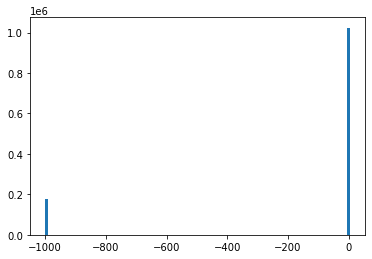

In [82]:
# Making a histogram of our 5 features


test = plt.hist(data["SpdE"], bins=100)
ax = plt.gca()

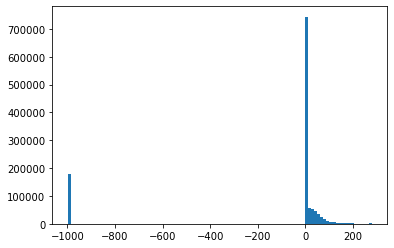

In [83]:
test = plt.hist(data["PrsE"], bins=100)
ax = plt.gca()


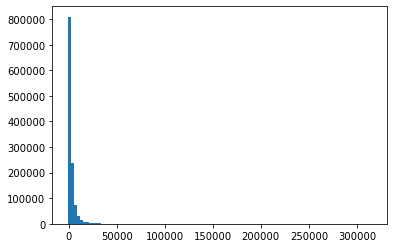

In [84]:
test = plt.hist(data["EcalE"], bins=100)
ax = plt.gca()

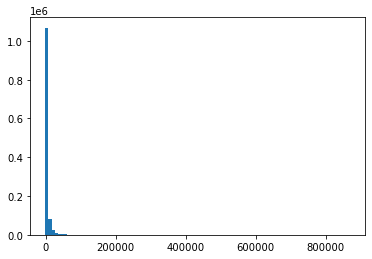

In [85]:

test = plt.hist(data["HcalE"], bins=100)
ax = plt.gca()

([<matplotlib.axis.XTick at 0x202a38af3a0>,
 [Text(1, 0, 'HcalE'), Text(2, 0, 'EcalE')])

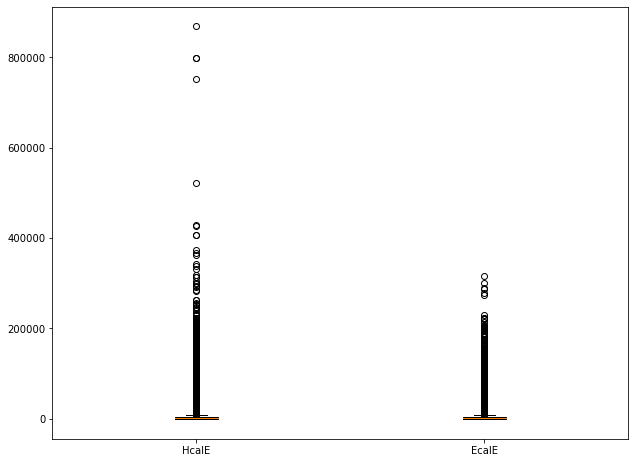

In [86]:
# Create dataset
HcalE =  data["HcalE"]
EcalE = data["EcalE"]
PrsE = data["PrsE"]
SpdE = data["SpdE"]
data2 = [HcalE, EcalE]
fig = plt.figure(figsize =(8, 6)) 
  
# Create axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Create plot 
bp = ax.boxplot(data2) 
  
# Show plot 
plt.xticks([1,2],['HcalE','EcalE'])
plt.show()

([<matplotlib.axis.XTick at 0x202c47a7460>,
 [Text(1, 0, 'PrsE'), Text(2, 0, 'SpdE')])

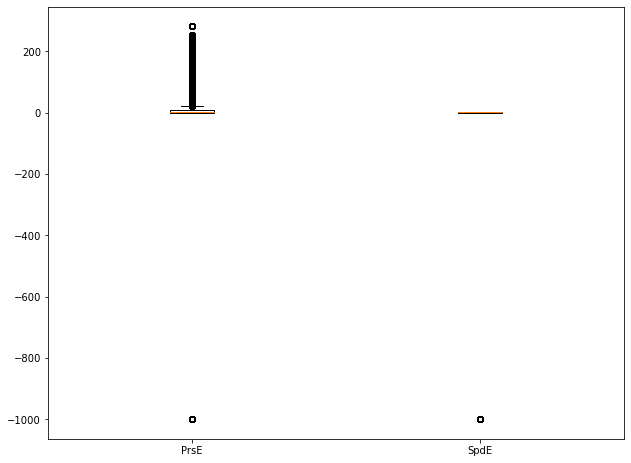

In [87]:
data3 = [PrsE,SpdE]
fig = plt.figure(figsize =(8, 6)) 
  
# Create axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Create plot 
bp = ax.boxplot(data3) 
  
# Show plot 
plt.xticks([1,2],['PrsE','SpdE'])
plt.show()

<AxesSubplot:>

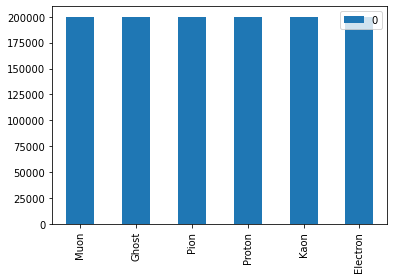

In [88]:
#We need to clean the data to make a histogram of the labels
LCount= Counter(data["Label"])
dl = pd.DataFrame.from_dict(LCount, orient='index')
dl.plot(kind='bar')

In [91]:
#For loop for descriptive stats
print("Mean Mode Median Variance Skew")
for x in featureList:
    xmean = np.mean(x)
    xmode = statistics.mode(x)
    xmedian = np.median(x)
    xvar = statistics.variance(x)
    xskew = scipy.stats.skew(x)
    
    print(xmean, xmode, xmedian, xvar, xskew)
    

Mean Mode Median Variance Skew
-144.3849181327798 3.20000004768 3.20000004768 125672.74576566137 -1.9959010843601999
-133.8947700270729 -999.0 2.468448906785 131694.75236729658 -1.942727817322219
2346.4362606248746 -999.0 659.0979812515 32719796.242591243 8.44556894881918
2900.029892430136 -999.0 578.012695767 59081456.146492645 11.58229322596505


In [69]:

#Creating a datafrom with the binned values
newdf = pd.DataFrame()
newdf['binE']=pd.cut(data['EcalE'], bins = [-100000,-1,0,3,10,1000,10000,100000,1000000])
newdf['binH'] = pd.cut(data['HcalE'], bins = [-100000,-1,0,3,10,1000,10000,100000,1000000])
newdf['binS'] = pd.cut(data['PrsE'], bins = [-100000,-1,0,3,10,1000,10000,100000,1000000])
newdf['binP'] = pd.cut(data['SpdE'], bins = [-100000,-1,0,3,10,1000,10000,100000,1000000])
newdf.head()






,binE,binH,binS,binP
0,"(0, 3]","(1000, 10000]","(10, 1000]","(3, 10]"
1,"(1000, 10000]","(-1, 0]","(10, 1000]","(3, 10]"
2,"(-100000, -1]","(-100000, -1]","(-100000, -1]","(-100000, -1]"
3,"(1000, 10000]","(1000, 10000]","(0, 3]","(3, 10]"
4,"(1000, 10000]","(1000, 10000]","(0, 3]","(3, 10]"


1200000


<AxesSubplot:>

                        0
(0, 3]             101873
(1000, 10000]      482365
(-100000, -1]      225792
(-1, 0]            100428
(10, 1000]         227983
(10000, 100000]     59345
(3, 10]              1924
(100000, 1000000]     290


<AxesSubplot:>

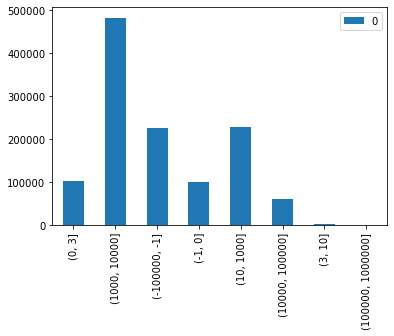

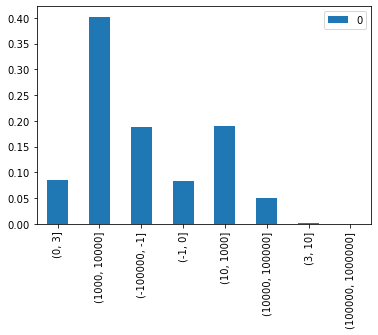

In [70]:
LCount= Counter(newdf["binE"])
sum1 = len(newdf["binE"])
print(sum1)
dl = pd.DataFrame.from_dict(LCount, orient='index')
dl.plot(kind='bar')
print(dl)
dl2 = dl.div(1200000)
dl2.plot(kind='bar')

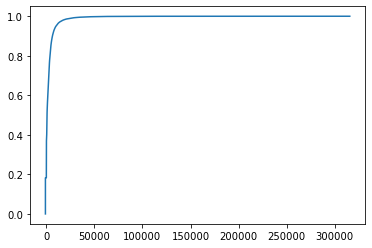

In [71]:
#sort data
x = np.sort(data["EcalE"])

#calculate CDF values
y = 1. * np.arange(len(data["EcalE"])) / (len(data["EcalE"]) - 1)

#plot CDF
plt.plot(x, y)

Text(0.5, 0, 'EcalE')

Text(0, 0.5, 'HcalE')

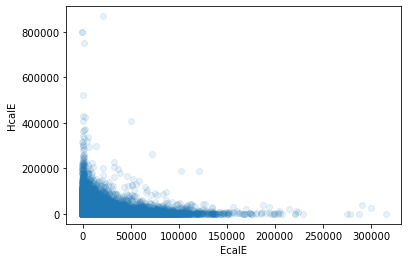

In [72]:
# Scatter Plot Two Variables
import numpy as np
import matplotlib.pyplot as plt


x = data["EcalE"]
y = data["HcalE"]

plt.scatter(x, y, alpha=0.1)
plt.xlabel('EcalE')
plt.ylabel('HcalE')
plt.show()

In [ ]:
xmin = 0.87

thinkplot.PrePlot(3)

xs, ps = thinkstats2.RenderParetoCdf(xmin, 0.4, 0, 300000.0, n=1000000) 
thinkplot.Plot(xs, ps, label='Pareto alpha = 0.4')
    
thinkplot.Config(title='Pareto CDF', xlabel='Energy Values of EcalE',
                 ylabel='CDF', loc='lower right')
#sort data
x = np.sort(data["EcalE"])

#calculate CDF values
y = 1. * np.arange(len(data["EcalE"])) / (len(data["EcalE"]) - 1)

#plot CDF
plt.plot(x, y, label='CDF of EcalE')

In [ ]:

stats.pearsonr(data["HcalE"],data["EcalE"])

In [ ]:
np.cov(data["HcalE"],data["EcalE"])

In [ ]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
Cov(data["HcalE"],data["EcalE"])

In [ ]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(data["HcalE"],data["EcalE"])

In [ ]:
Corr(data["HcalE"]**2,data["EcalE"])

In [ ]:
Corr(data["HcalE"],data["EcalE"]**2)

In [ ]:
Corr(data["PrsE"]**2,data["SpdE"])

In [ ]:
Corr(data["PrsE"],data["SpdE"])

In [ ]:
Cov(data["PrsE"]**2,data["SpdE"])
Cov(data["PrsE"],data['SpdE'])

In [ ]:

x = data["PrsE"]
y = data["SpdE"]

plt.scatter(x, y, alpha=0.1, label=['PrsE', 'SpdE'])
plt.xlabel('PrsE')
plt.ylabel('SpdE')
plt.show()

Text(0.5, 0, 'PrsE**PrsE')

Text(0, 0.5, 'SpdE')

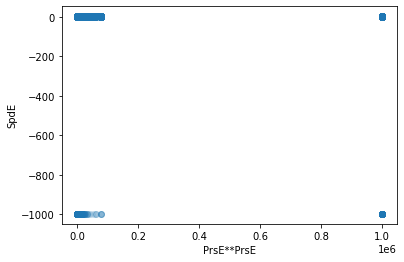

In [38]:

x = data["PrsE"]**2
y = data["SpdE"]

plt.scatter(x, y, alpha=0.1)
plt.xlabel('PrsE**PrsE')
plt.ylabel('SpdE')
plt.show()

In [40]:
ht = CorrelationPermute((data["PrsE"].values,data["SpdE"].values))
pvalue = ht.PValue()
pvalue

ht2 = CorrelationPermute((data["PrsE"].values**2,data["SpdE"].values))
pvalue2 = ht2.PValue()
pvalue2

0.0

0.0

In [55]:
for y in FT:
    for x in Dummylist:
        PrsEP= CorrelationPermute((data[y].values,RegData[x].values))
        Pvalue = PrsEP.PValue()
        print('Pvalue of ',y,' acting on ',x,' : ',Pvalue)



Pvalue of  HcalE  acting on  Electron  :  0.0
Pvalue of  HcalE  acting on  Muon  :  0.0
Pvalue of  HcalE  acting on  Ghost  :  0.0
Pvalue of  HcalE  acting on  Proton  :  0.0
Pvalue of  HcalE  acting on  Kaon  :  0.0
Pvalue of  HcalE  acting on  Pion  :  0.0
Pvalue of  EcalE  acting on  Electron  :  0.0
Pvalue of  EcalE  acting on  Muon  :  0.0
Pvalue of  EcalE  acting on  Ghost  :  0.0
Pvalue of  EcalE  acting on  Proton  :  0.0
Pvalue of  EcalE  acting on  Kaon  :  0.0
Pvalue of  EcalE  acting on  Pion  :  0.0
Pvalue of  PrsE  acting on  Electron  :  0.0
Pvalue of  PrsE  acting on  Muon  :  0.0
Pvalue of  PrsE  acting on  Ghost  :  0.0
Pvalue of  PrsE  acting on  Proton  :  0.0
Pvalue of  PrsE  acting on  Kaon  :  0.0
Pvalue of  PrsE  acting on  Pion  :  0.0
Pvalue of  SpdE  acting on  Electron  :  0.0
Pvalue of  SpdE  acting on  Muon  :  0.0
Pvalue of  SpdE  acting on  Ghost  :  0.0
Pvalue of  SpdE  acting on  Proton  :  0.0
Pvalue of  SpdE  acting on  Kaon  :  0.0
Pvalue of  SpdE  

In [73]:
DummyData = pd.get_dummies(data['Label'])


In [74]:
#Create Regression Data
RegData= pd.DataFrame()
RegData['HcalE']= data['HcalE']
RegData['EcalE']= data['EcalE']
RegData['PrsE']= data['PrsE']
RegData['SpdE']= data['SpdE']
RegData['Electron']= DummyData['Electron']
RegData['Muon']= DummyData['Muon']
RegData['Kaon']= DummyData['Kaon']
RegData['Ghost']= DummyData['Ghost']
RegData['Proton']= DummyData['Proton']
RegData['Pion']= DummyData['Pion']
FT = ['HcalE', 'EcalE','PrsE','SpdE']
Dummylist=['Electron', 'Muon', 'Ghost', 'Proton', 'Kaon','Pion']

In [75]:
formula = 'Ghost ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ghost   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2252.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:12   Log-Likelihood:            -5.1379e+05
No. Observations:             1200000   AIC:                         1.028e+06
Df Residuals:                 1199995   BIC:                         1.028e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1741      0.000    399.610      0.000       0.173       0.175
HcalE      -1.881e-06   4.51e-08    -41.739      0.000   -1.97e-06   -1.79e-06
EcalE      -3.345e-06   6.22e-08    -53.733      0.000   -3.47e-06   -3.22e-06
PrsE        7.133e-06   4.18e-06      1.705      0.088   -1.07e-06    1.53e-05
SpdE       -4.756e-05   4.25e-06    -11.200      0.000   -5.59e-05   -3.92e-05
==============================================================================
Omnibus:                   335109.090   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694598.148
Skew:                           1.769   Prob(JB):                         0.00
Kurtosis:                       4.175   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:

formula = 'Proton ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Proton   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2182.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:13   Log-Likelihood:            -5.1393e+05
No. Observations:             1200000   AIC:                         1.028e+06
Df Residuals:                 1199995   BIC:                         1.028e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1629      0.000    373.894      0.000       0.162       0.164
HcalE       3.452e-06   4.51e-08     76.596      0.000    3.36e-06    3.54e-06
EcalE      -1.405e-06   6.23e-08    -22.572      0.000   -1.53e-06   -1.28e-06
PrsE          -0.0002   4.18e-06    -39.635      0.000      -0.000      -0.000
SpdE           0.0002   4.25e-06     40.968      0.000       0.000       0.000
==============================================================================
Omnibus:                   336115.134   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           698240.988
Skew:                           1.769   Prob(JB):                         0.00
Kurtosis:                       4.204   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:

formula = 'Pion ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pion   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1797.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:13   Log-Likelihood:            -5.1469e+05
No. Observations:             1200000   AIC:                         1.029e+06
Df Residuals:                 1199995   BIC:                         1.029e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1704      0.000    391.008      0.000       0.170       0.171
HcalE        2.18e-06   4.51e-08     48.351      0.000    2.09e-06    2.27e-06
EcalE      -3.165e-06   6.23e-08    -50.800      0.000   -3.29e-06   -3.04e-06
PrsE          -0.0002   4.19e-06    -37.672      0.000      -0.000      -0.000
SpdE           0.0002   4.25e-06     38.762      0.000       0.000       0.000
==============================================================================
Omnibus:                   335670.612   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           696539.454
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                       4.179   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:

formula = 'Electron ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Electron   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                 5.150e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:14   Log-Likelihood:            -4.2322e+05
No. Observations:             1200000   AIC:                         8.465e+05
Df Residuals:                 1199995   BIC:                         8.465e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1203      0.000    297.858      0.000       0.120       0.121
HcalE      -6.591e-06   4.18e-08   -157.758      0.000   -6.67e-06   -6.51e-06
EcalE       2.048e-05   5.77e-08    354.817      0.000    2.04e-05    2.06e-05
PrsE           0.0006   3.88e-06    165.778      0.000       0.001       0.001
SpdE          -0.0007   3.94e-06   -182.072      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   325104.205   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           797548.961
Skew:                           1.507   Prob(JB):                         0.00
Kurtosis:                       5.620   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:

formula = 'Muon ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Muon   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:14   Log-Likelihood:            -4.9786e+05
No. Observations:             1200000   AIC:                         9.957e+05
Df Residuals:                 1199995   BIC:                         9.958e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2109      0.000    490.575      0.000       0.210       0.212
HcalE      -1.536e-06   4.45e-08    -34.551      0.000   -1.62e-06   -1.45e-06
EcalE      -1.121e-05   6.14e-08   -182.570      0.000   -1.13e-05   -1.11e-05
PrsE          -0.0002   4.13e-06    -38.631      0.000      -0.000      -0.000
SpdE           0.0002   4.19e-06     57.474      0.000       0.000       0.000
==============================================================================
Omnibus:                   319858.880   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643288.609
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                       4.077   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
formula = 'Kaon ~ HcalE+EcalE+PrsE+SpdE'
model = smf.ols(formula, data=RegData)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Kaon   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3272.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:15   Log-Likelihood:            -5.1177e+05
No. Observations:             1200000   AIC:                         1.024e+06
Df Residuals:                 1199995   BIC:                         1.024e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1615      0.000    371.327      0.000       0.161       0.162
HcalE       4.376e-06    4.5e-08     97.296      0.000    4.29e-06    4.46e-06
EcalE      -1.352e-06   6.21e-08    -21.751      0.000   -1.47e-06   -1.23e-06
PrsE          -0.0002   4.18e-06    -40.039      0.000      -0.000      -0.000
SpdE           0.0002   4.24e-06     43.630      0.000       0.000       0.000
==============================================================================
Omnibus:                   334886.038   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694384.352
Skew:                           1.758   Prob(JB):                         0.00
Kurtosis:                       4.234   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""